In [16]:
## Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all
import scipy.io
import numpy as np
from matplotlib import use
import matplotlib.pyplot as plt
use('TkAgg')
%matplotlib inline

#from oneVsAll import oneVsAll
#from predictOneVsAll import predictOneVsAll
#from displayData import displayData

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     lrCostFunction.m (logistic regression cost function)
#     oneVsAll.m
#     predictOneVsAll.m
#     predict.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

C:\Users\HTDA\Anaconda2\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
## Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                         # (note that we have mapped "0" to label 10)

In [17]:
## displayData.py
## ==============================================

def displayData(X):
    """displays 2D data
      stored in X in a nice grid. It returns the figure handle h and the
      displayed array if requested."""

# Compute rows, cols
    m, n = X.shape
    example_width = round(np.sqrt(n))
    example_height = (n / example_width)

# Compute number of items to display
    display_rows = np.floor(np.sqrt(m))
    display_cols = np.ceil(m / display_rows)

# Between images padding
    pad = 1

# Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),
                           pad + display_cols * (example_width + pad)))

# Copy each example into a patch on the display array
    curr_ex = 0
    for j in np.arange(display_rows):
        for i in np.arange(display_cols):
            if curr_ex > m:
                break
            # Get the max value of the patch
            max_val = np.max(np.abs(X[curr_ex, : ]))
            rows = [pad + j * (example_height + pad) + x for x in np.arange(example_height+1)]
            cols = [pad + i * (example_width + pad)  + x for x in np.arange(example_width+1)]
            display_array[min(rows):max(rows), min(cols):max(cols)] = X[curr_ex, :].reshape(example_height, example_width) / max_val
            curr_ex = curr_ex + 1
        if curr_ex > m:
            break

# Display Image
    display_array = display_array.astype('float32')
    plt.imshow(display_array.T)
    plt.set_cmap('gray')
# Do not show axis
    plt.axis('off')




In [18]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

data = scipy.io.loadmat('ex3data1.mat') # training data stored in arrays X, y
X = data['X']
y = data['y']
m, _ = X.shape

# Randomly select 100 data points to display
rand_indices = np.random.permutation(range(m))
sel = X[rand_indices[0:100], :]

C:\Users\HTDA\Anaconda2\lib\site-packages\ipykernel\__main__.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


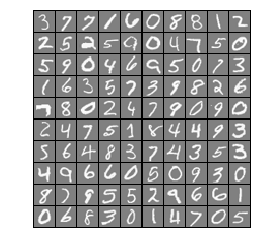

In [19]:
displayData(sel)

In [21]:
## ============ Part 2: Vectorize Logistic Regression ============
#  In this part of the exercise, you will reuse your logistic regression
#  code from the last exercise. You task here is to make sure that your
#  regularized logistic regression implementation is vectorized. After
#  that, you will implement one-vs-all classification for the handwritten
#  digit dataset.
#

In [24]:
import numpy as np
from scipy.optimize import minimize


#from lrCostFunction import lrCostFunction
#from ex2.gradientFunctionReg import gradientFunctionReg

In [28]:
## gradientFunctionReg -- import
## ====================================
from numpy import e

def sigmoid(z):
    """computes the sigmoid of z."""
    g = 1/(1+e ** (-z))


    return g

def h(theta,X):
    return sigmoid(np.dot(X,theta.T))

#from sigmoid import sigmoid
from numpy import squeeze, asarray


def gradientFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression with regularization

    computes the cost of using theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters.
    """

    m = len(y)   # number of training examples
    
    grad = np.dot(h(theta, X) - y.T, X)/m

    return grad[0]

def gradientFunctionReg(theta, X, y, Lambda):
    """
    Compute cost and gradient for logistic regression with regularization

    computes the cost of using theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters.
    """
    m = len(y)   # number of training examples
    theta0=np.copy(theta)
    theta0[0]=0
    grad = gradientFunction(theta, X, y) + Lambda * theta0 / m

    return grad

In [26]:
## lrCostFuction -- immport
## ==================================

#from ex2.costFunctionReg import costFunctionReg
def costFunction(theta, X,y):
    """ computes the cost of using theta as the
    parameter for logistic regression and the
    gradient of the cost w.r.t. to the parameters."""

# Initialize some useful values
    m = y.size # number of training examples
    J = (-y.T * log(h(theta,X)) - (1-y.T) * log(1 - h(theta,X))).sum(axis=1)/m
    return J.sum()

def costFunctionReg(theta, X, y, Lambda):
    """
    Compute cost and gradient for logistic regression with regularization

    computes the cost of using theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters.
    """
    # Initialize some useful values
    m = len(y)   # number of training examples
    J = costFunction(theta, X, y) + (Lambda/(2*m)) * sum(theta[1:] ** 2)

    return J


def lrCostFunction(theta, X, y, Lambda):
    """computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters.
    """

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta.
#               You should set J to the cost.
#
# Hint: The computation of the cost function and gradients can be
#       efficiently vectorized. For example, consider the computation
#
#           sigmoid(X * theta)
#
#       Each row of the resulting matrix will contain the value of the
#       prediction for that example. You can make use of this to vectorize
#       the cost function and gradient computations. 
#



    # =============================================================

    return J


In [ ]:
def oneVsAll(X, y, num_labels, Lambda):
    """trains multiple logistic regression classifiers and returns all
        the classifiers in a matrix all_theta, where the i-th row of all_theta
        corresponds to the classifier for label i
    """

# Some useful variables
    m, n = X.shape

# You need to return the following variables correctly 
    all_theta = np.zeros((num_labels, n + 1))

# Add ones to the X data matrix
    X = np.column_stack((np.ones((m, 1)), X))

# ====================== YOUR CODE HERE ======================
# Instructions: You should complete the following code to train num_labels
#               logistic regression classifiers with regularization
#               parameter lambda. 
#
# Hint: theta(:) will return a column vector.
#
# Hint: You can use y == c to obtain a vector of 1's and 0's that tell use 
#       whether the ground truth is true/false for this class.
#
# Note: For this assignment, we recommend using fmincg to optimize the cost
#       function. It is okay to use a for-loop (for c = 1:num_labels) to
#       loop over the different classes.

    # Set Initial theta
    initial_theta = np.zeros((n + 1, 1))

    # This function will return theta and the cost



# =========================================================================

    return all_theta

In [27]:
print 'Training One-vs-All Logistic Regression...'

Lambda = 0.1
all_theta = oneVsAll(X, y, num_labels, Lambda)

Training One-vs-All Logistic Regression...


NameError: name 'oneVsAll' is not defined

In [20]:
## ================ Part 3: Predict for One-Vs-All ================
#  After ...
pred = predictOneVsAll(all_theta, X)

accuracy = np.mean(np.double(pred == np.squeeze(y))) * 100
print '\nTraining Set Accuracy: %f\n' % accuracy

Training One-vs-All Logistic Regression...


NameError: name 'oneVsAll' is not defined